In [1]:
import scipy.io as sio
import scipy
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import math
import pickle
from sklearn.cluster import KMeans, AgglomerativeClustering

In [41]:
# Calculate center of image
def calculate_center(joint_pos):
    center_x = 0
    center_y = 0
    for val in joint_pos.values():
        center_x += val[0]
        center_y += val[1]
        
    center_x = center_x/len(joint_pos)
    center_y = center_y/len(joint_pos)
    
    return center_x, center_y


# Calculate sigma for image keypoints
def calculate_sigma(joint_pos):
    sigma = 0
    center_point = 'head_top'
    center_x, center_y = calculate_center(joint_pos)
    for i in ['r_elbow', 'r_shoulder', 'r_wrist', 'l_shoulder']:
        #x_diff = joint_pos[i][0] - joint_pos[center_point][0]
        #y_diff = joint_pos[i][1] - joint_pos[center_point][1]
        x_diff = joint_pos[i][0] - center_x
        y_diff = joint_pos[i][1] - center_y
        sigma = sigma + x_diff*x_diff + y_diff*y_diff
    
    sigma = 0.25 * sigma
    sigma = math.sqrt(sigma)
    return sigma

def display_img(img):
    img = img[...,::-1]
    plt.figure(figsize=(20, 30))
    plt.imshow(img)
    plt.show()

# Extract image around center by sigma
def show_subsection(img, sigma, center_x, center_y):
    x_start = int(center_x-sigma)
    x_end = int(center_x+sigma)
    y_start = int(center_y-sigma)
    y_end = int(center_y+sigma)
    crop_img = img[y_start:y_end, x_start:x_end]
    display_img(crop_img)
    img = cv2.rectangle(img,(x_start, y_start),(x_end,y_end),(0,255,0),3)
    display_img(img)
    
def draw_bounding_box(img_file, joints):
    img_dir = "mp2/images/"
    img = cv2.imread(img_dir+ img_file)
    center_x, center_y = calculate_center(joints)
    sigma = calculate_sigma(joints)
    show_subsection(img, sigma, joints['r_elbow'][0], joints['r_elbow'][1])
    
def fix_size(max_val, curr_val):
    if curr_val < 0:
        return 0
    elif curr_val > max_val:
        return max_val
    else:
        return curr_val
    
def crop_and_save(indx, img_file, joints):
    img_dir = "mp2/images/"
    cropped_img_dir = "mp2/cropped_imgs/"
    img = cv2.imread(img_dir+ img_file)
    center_x, center_y = (joints['r_elbow'][0], joints['r_elbow'][1])
    sigma = calculate_sigma(joints)
    
    max_x = img.shape[1]
    max_y = img.shape[0]
    
    x_start = fix_size(max_x, int(center_x-sigma))
    x_end = fix_size(max_x, int(center_x+sigma))
    y_start = fix_size(max_y, int(center_y-sigma))
    y_end = fix_size(max_y, int(center_y+sigma))
    print(x_start, x_end, y_start, y_end, sigma)
    cropped_img = img[y_start:y_end, x_start:x_end]
    cropped_img = cv2.resize(cropped_img, (96, 96))
    cv2.imwrite(cropped_img_dir+str(indx)+'.jpeg',cropped_img)

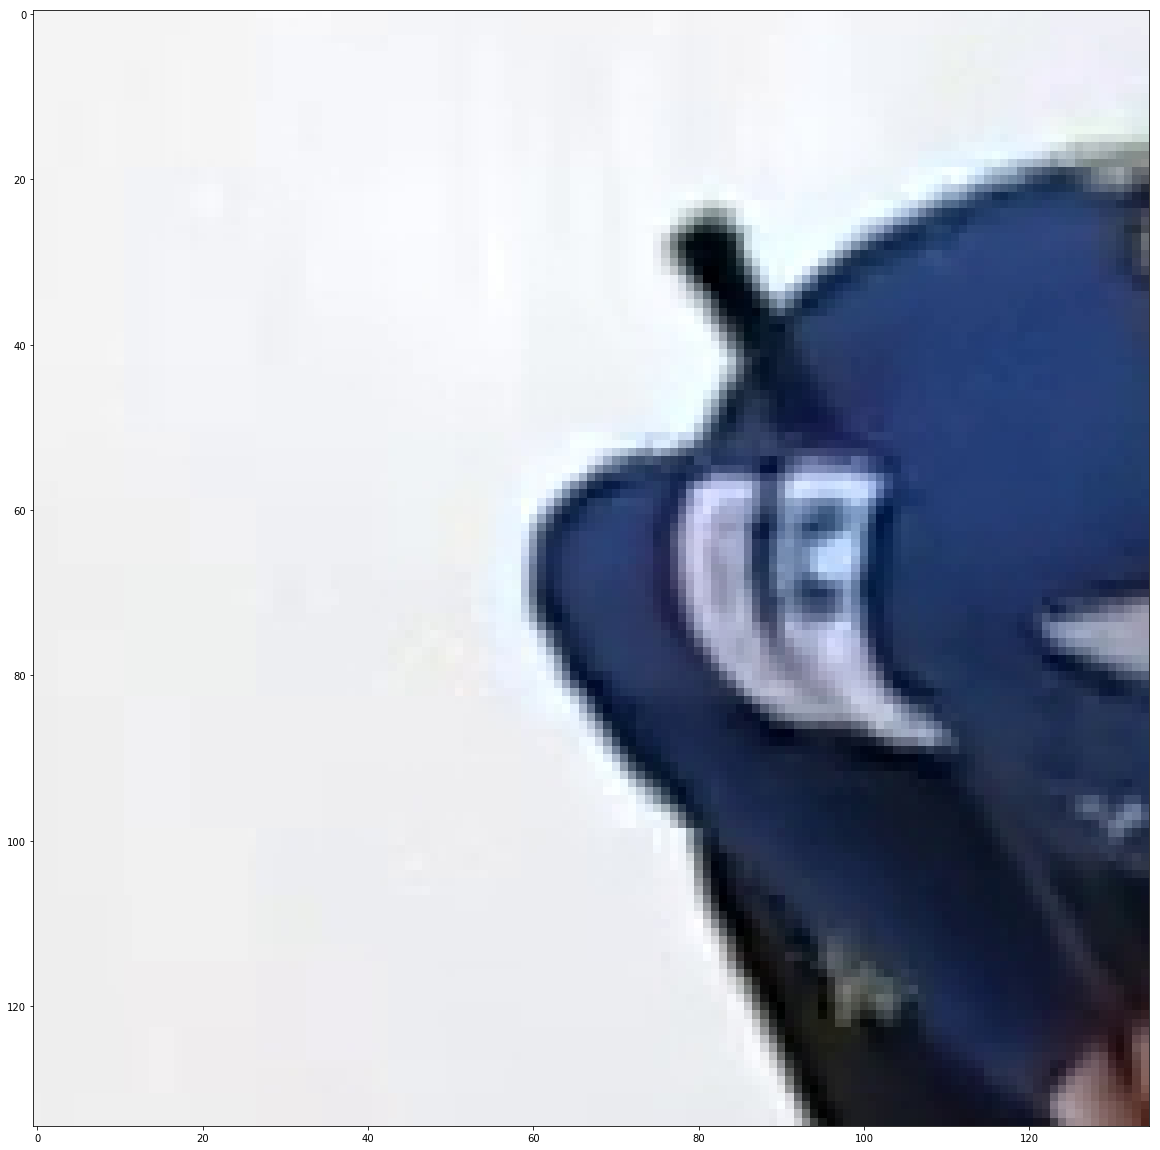

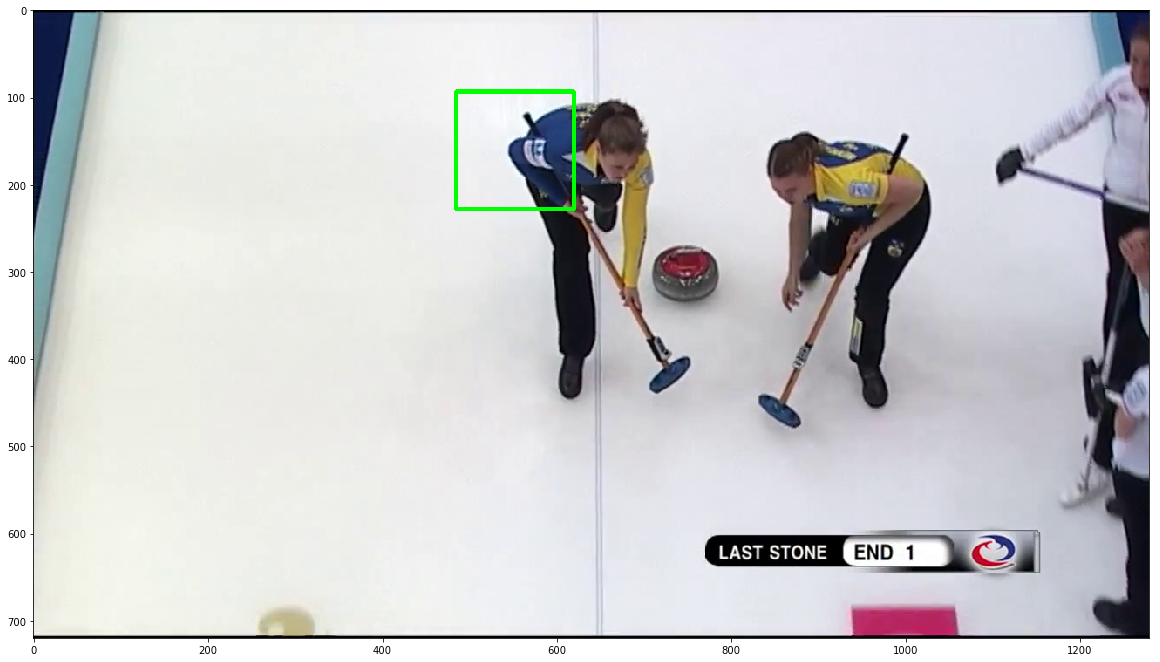

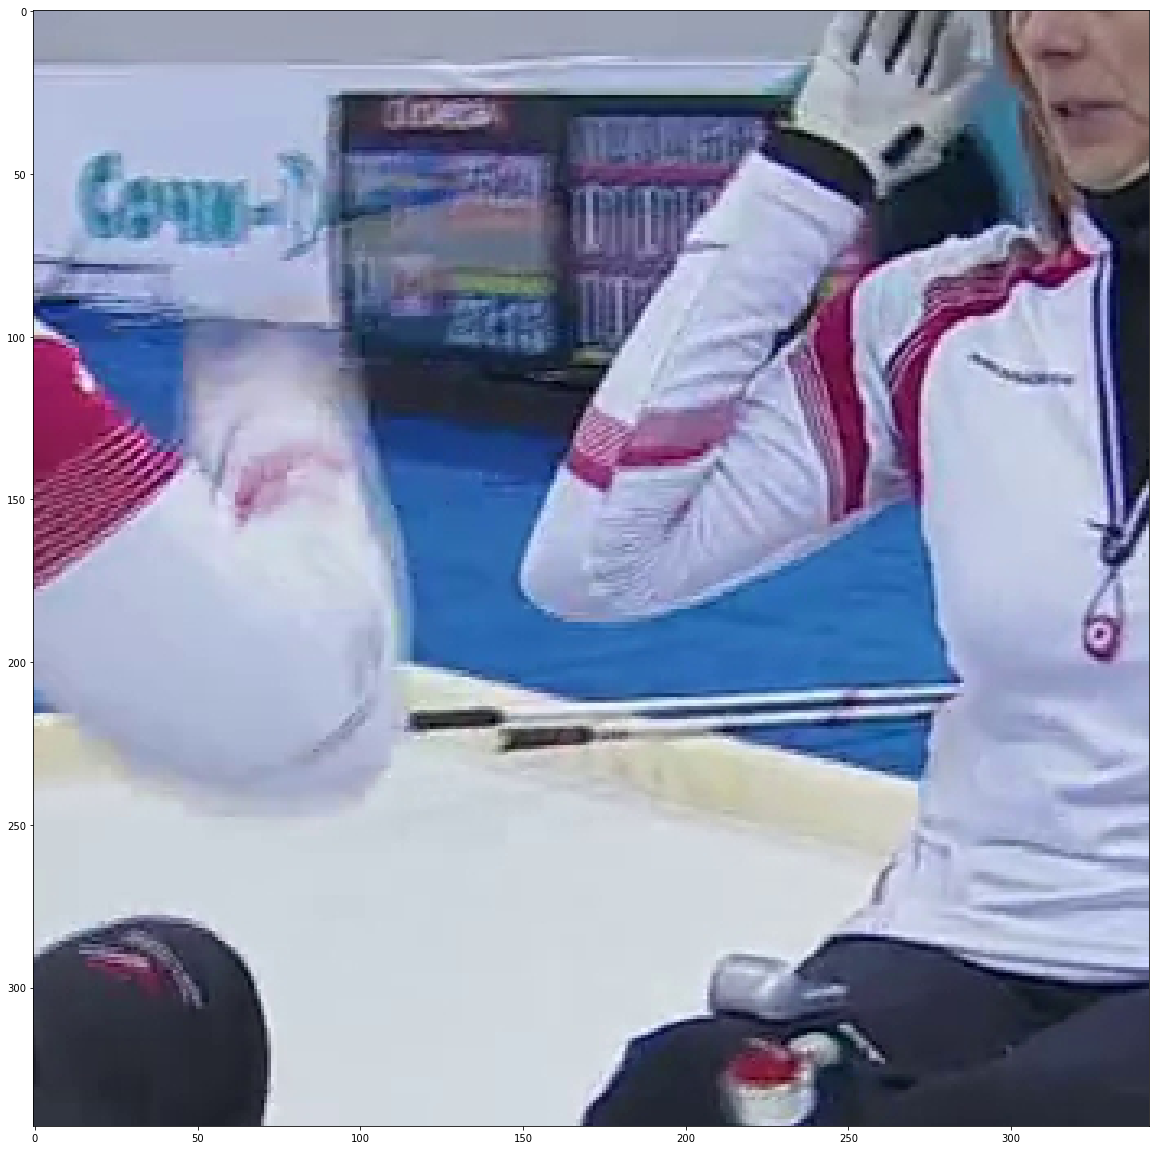

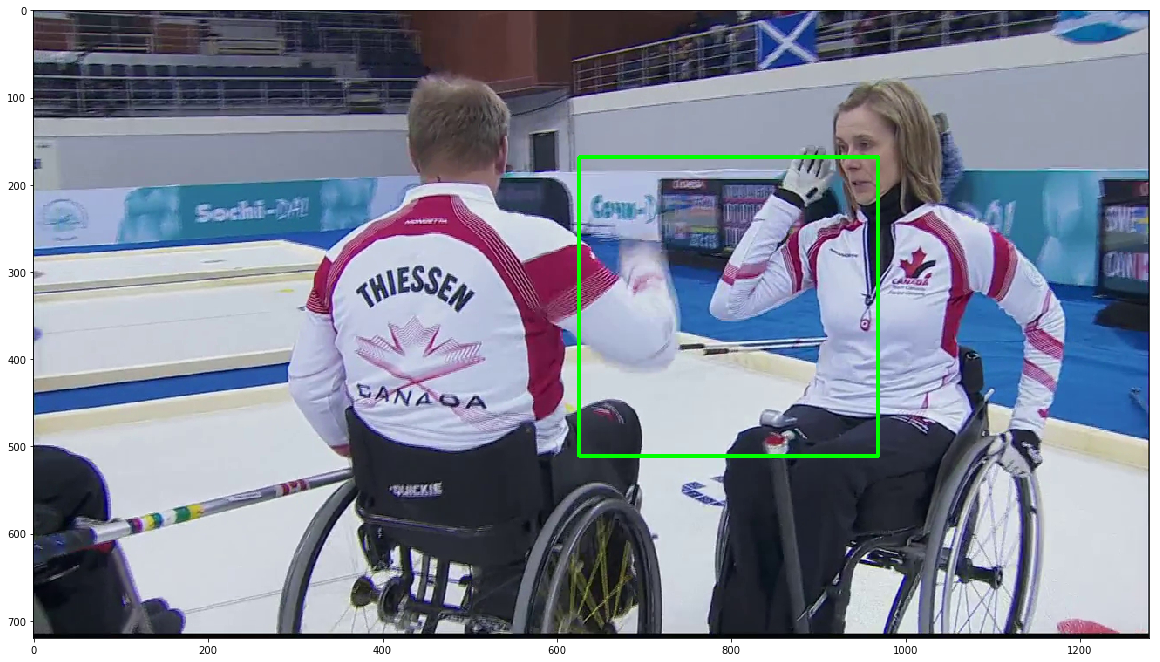

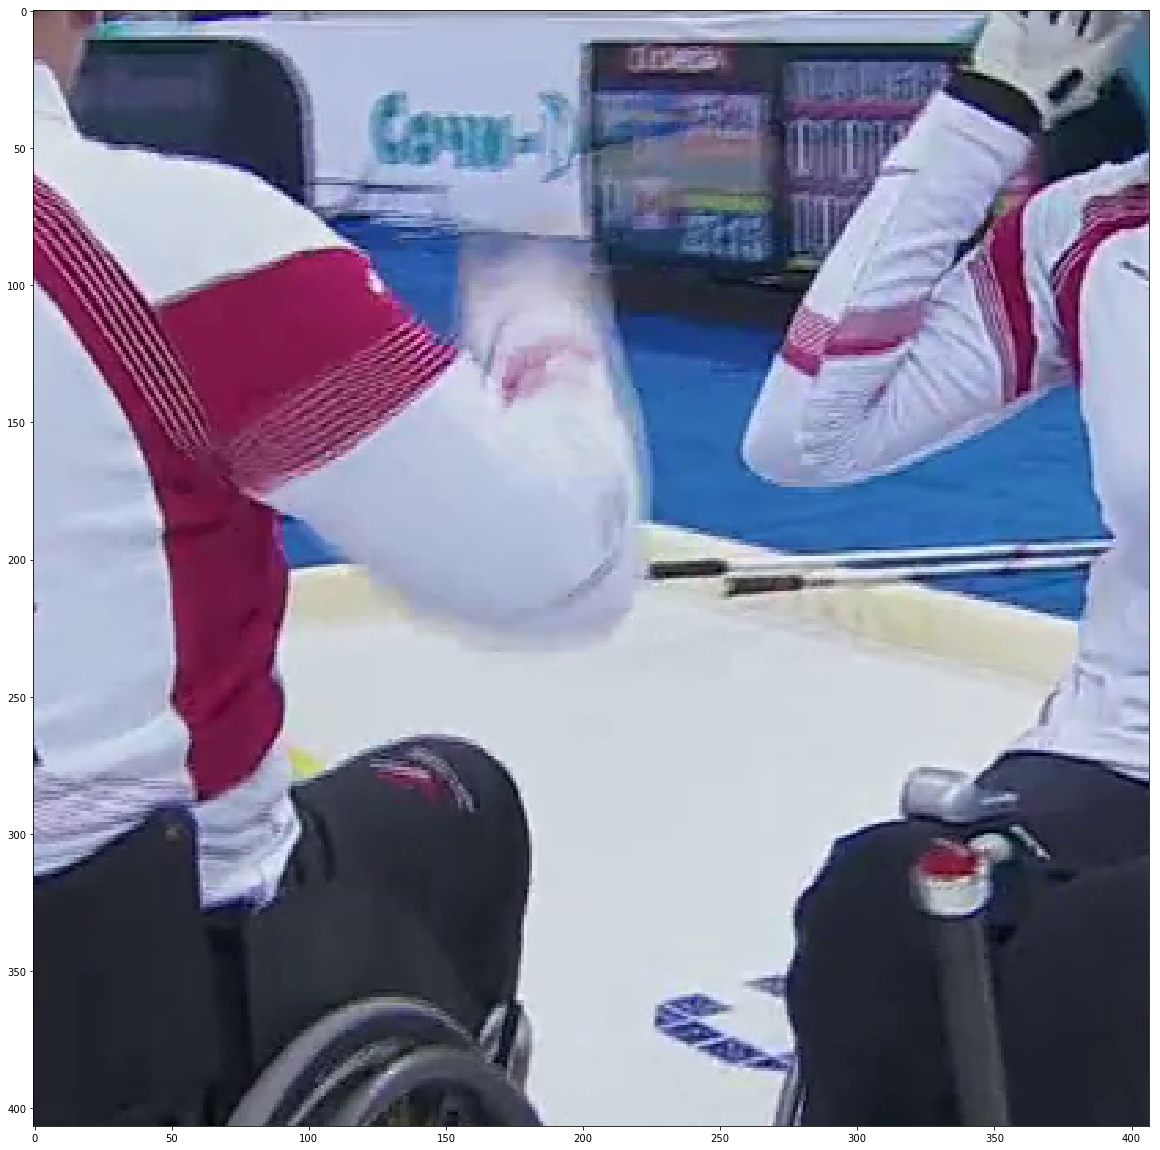

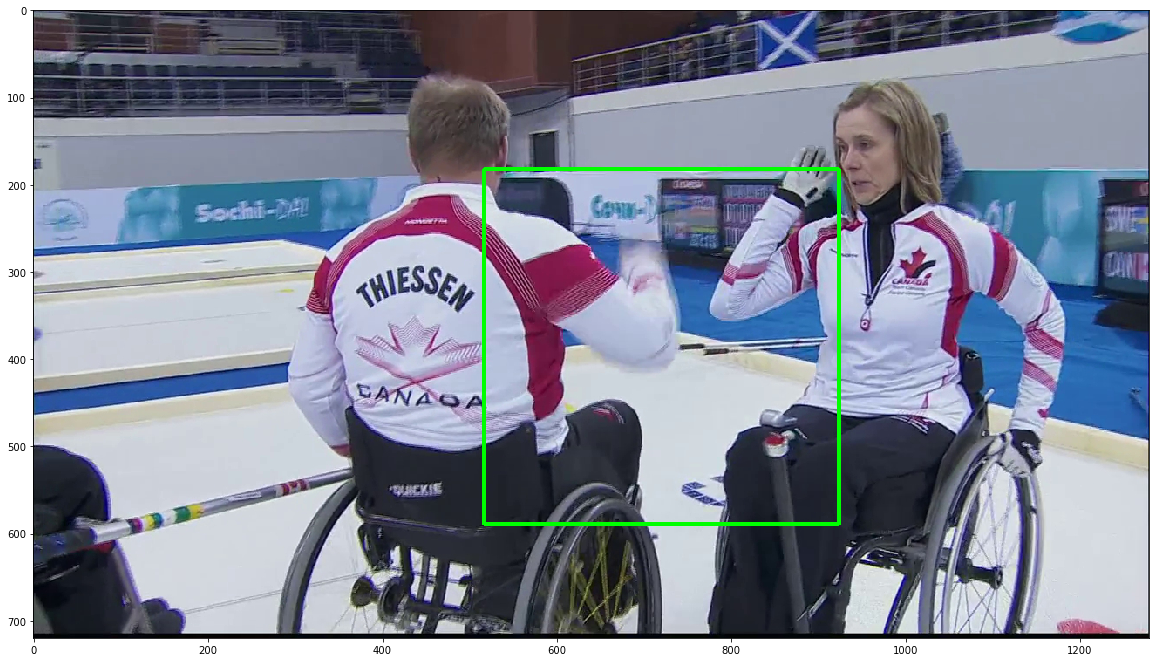

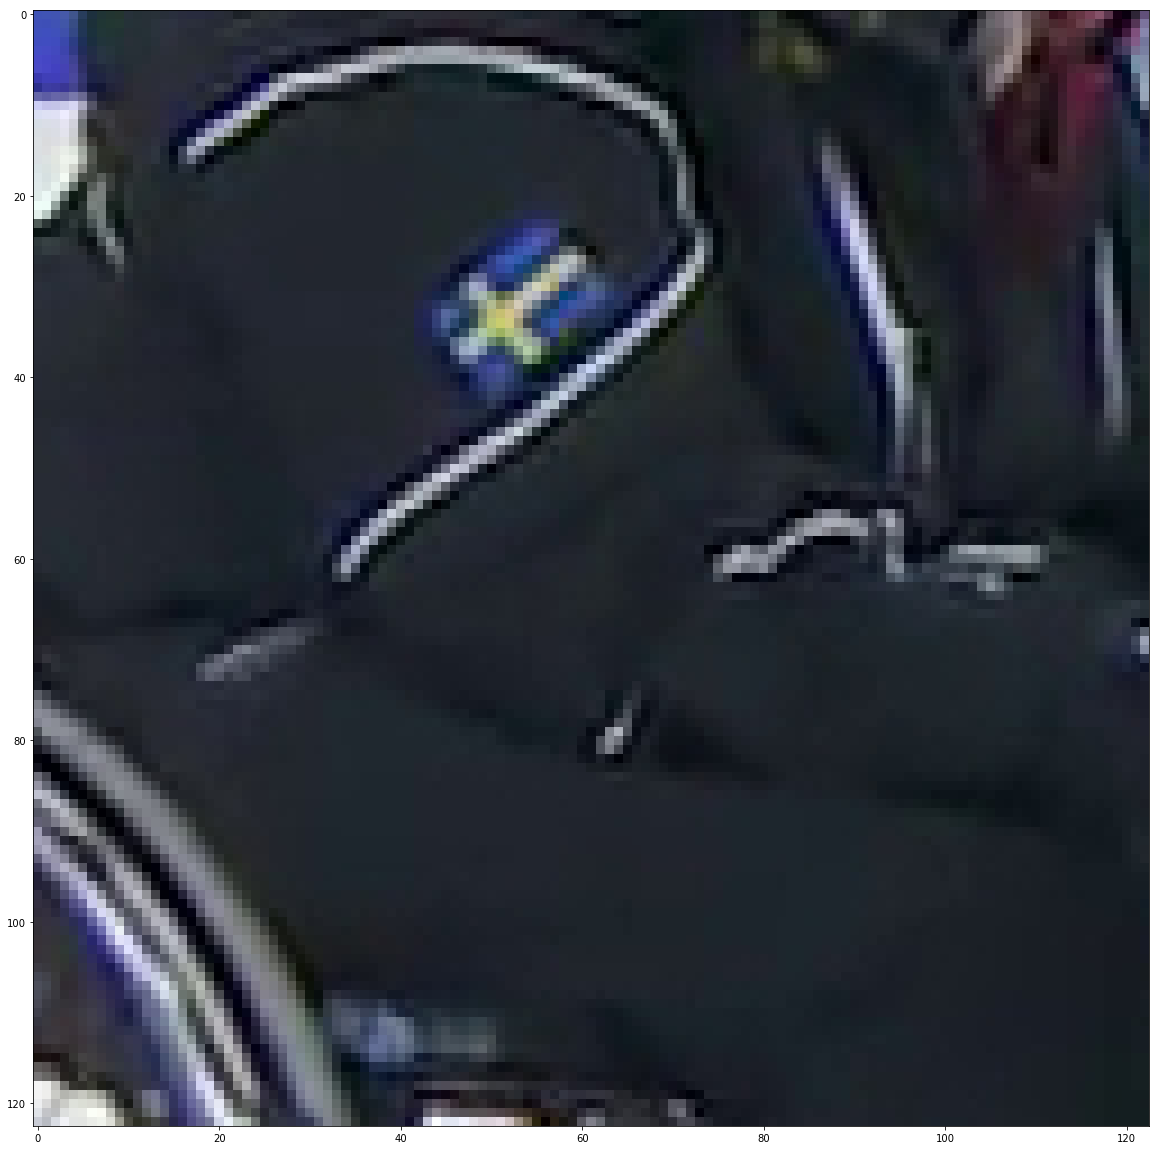

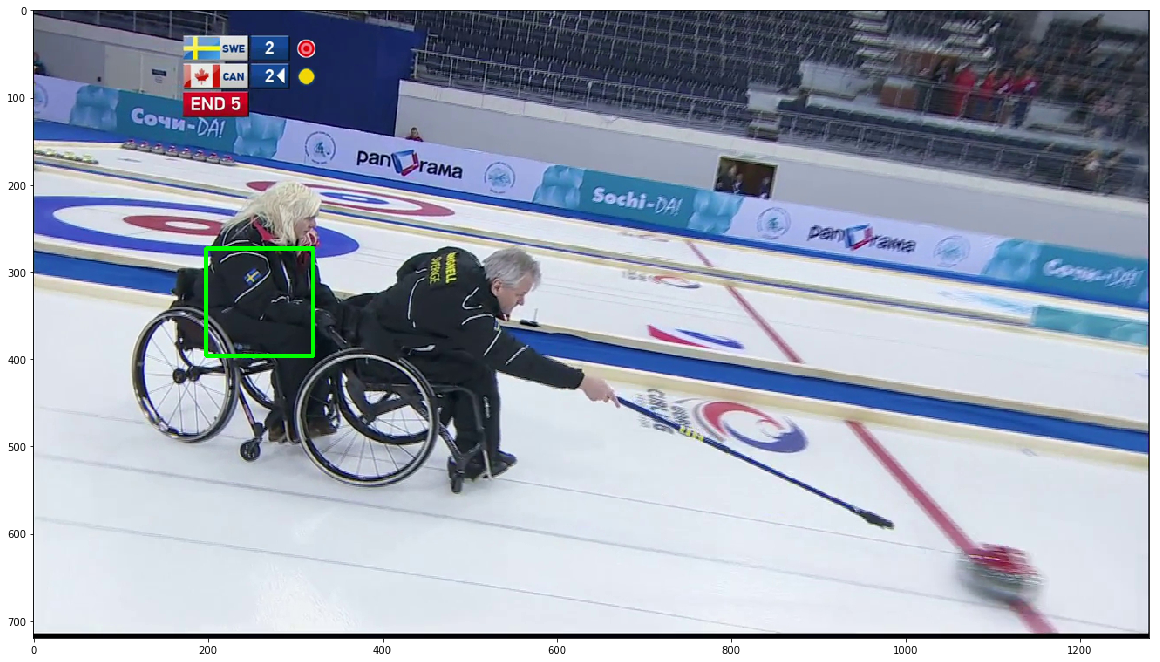

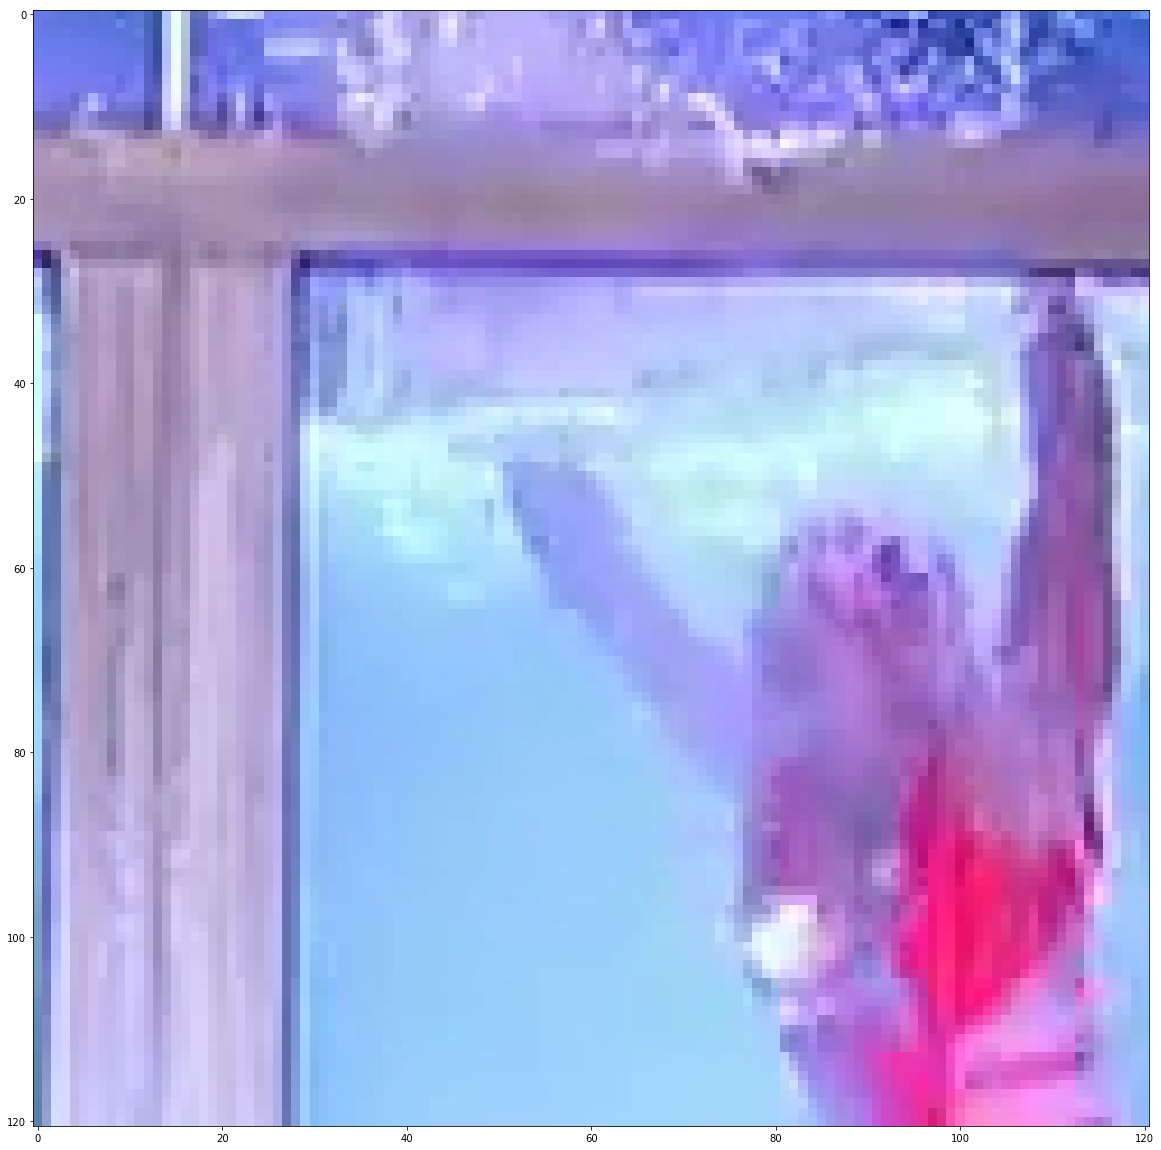

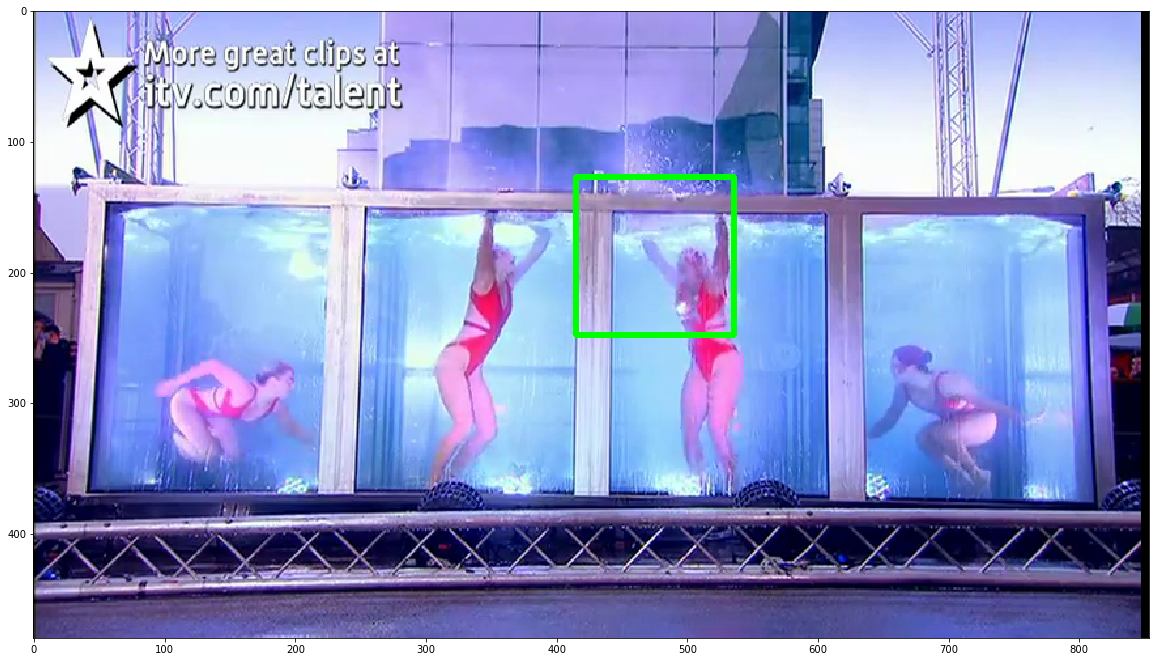

In [26]:
img_data = pickle.load( open( "img_data.p", "rb" ) )
#first_img_file = img_data['img_lst'][0]
#joints = img_data['orig_joint_lst'][0]

draw_bounding_box(img_data['img_lst'][0], img_data['orig_joint_lst'][0])
draw_bounding_box(img_data['img_lst'][1], img_data['orig_joint_lst'][1])
draw_bounding_box(img_data['img_lst'][2], img_data['orig_joint_lst'][2])
draw_bounding_box(img_data['img_lst'][3], img_data['orig_joint_lst'][3])
draw_bounding_box(img_data['img_lst'][30], img_data['orig_joint_lst'][30])

In [42]:

for i in range(0, len(img_data['img_lst'])):
    crop_and_save(i, img_data['img_lst'][i], img_data['orig_joint_lst'][i])

485 620 93 228 67.78873431478124
626 969 168 511 171.51794731164432
517 924 182 589 203.03719255963918
198 321 273 396 61.15758334008956
459 642 306 489 91.59747625480738
629 878 122 371 124.56088496193337
713 894 146 327 90.97074134714964
146 745 134 720 299.06882177226373
281 426 188 333 72.24897274356225
206 353 214 361 73.5095657040633
241 372 209 340 65.22035964712246
278 395 188 305 58.69242524593783
253 384 139 270 65.32111187242606
424 559 170 305 67.43816612275278
199 362 126 289 81.1684687086063
395 540 166 311 72.97784338413955
348 589 80 321 120.62689441517593
380 721 136 477 170.78985854332802
388 663 172 447 137.32996588964113
726 907 350 531 90.7317905284581
226 513 152 439 143.52358527869208
176 373 59 256 98.72564968765715
333 478 184 329 72.14189576799323
561 698 220 357 68.95891553127848
702 853 243 394 75.2737971092863
768 933 161 326 82.77798809164184
899 1082 177 360 91.92832211157778
1018 1189 206 377 85.24340150416336
99 174 234 309 37.41934033691668
290 403 123

706 1055 277 626 174.60233836492569
1130 1427 396 693 148.5208844742045
60 355 369 664 147.8497970915077
395 468 98 171 36.41433654826077
367 446 123 202 39.37053546117958
99 222 202 325 61.19247936838317
586 681 173 268 47.350958609620584
683 816 230 363 66.5256646904035
614 723 218 327 54.30131501630508
846 963 194 311 58.997384740766265
584 1285 447 1080 350.79675494686376
325 444 641 760 59.17284665494808
438 531 596 689 46.02792970034607
102 211 359 468 54.998082352933
744 841 569 666 48.266876905907225
1002 1129 535 662 63.50741221503203
928 1035 374 481 53.33799214678033
1033 1120 368 455 43.78721631366854
116 339 63 286 111.65869452263894
752 1025 420 693 136.24949827889276
356 609 183 436 126.82555994849777
344 635 111 402 145.56017870626567
479 688 200 409 104.02931152444488
255 418 338 501 81.00745046753416
794 983 244 433 94.55669595538964
574 705 196 327 65.52733804489543
52 227 55 230 87.05152928007641
655 828 268 441 86.40009584774776
493 684 130 321 95.82898993780536
31

175 284 181 290 54.071278189071876
169 244 262 337 37.52957167354831
0 123 103 276 86.44581485676447
147 244 175 272 48.11497460510605
296 383 158 245 43.141935080615006
195 328 183 316 66.11096850183031
29 172 187 330 71.23445554119158
133 272 177 316 69.6601403691523
461 552 126 217 45.90147396870824
171 368 119 316 98.59729094275359
214 425 121 332 105.57315665570486
931 1260 205 534 164.86180292141657
684 955 234 505 135.54832221849892
1046 1313 114 381 133.25433857852428
1005 1300 77 372 147.73203412344256
71 304 233 466 116.65430366043087
276 415 90 229 69.07120985801538
277 398 116 237 60.916983725805075
466 649 81 264 91.24685354164274
357 490 87 220 66.69057513997012
321 664 161 504 171.1669620757756
295 694 12 411 199.56971291380864
504 845 68 409 170.88322950190286
171 386 298 513 107.67052245740243
354 569 281 496 107.13017782119101
871 1046 103 278 87.79752986274728
28 415 1 388 193.5499168496334
426 711 401 686 142.87063915042165
393 662 386 655 134.97036711811967
364 655

218 393 226 401 87.1928761783324
407 652 665 910 122.41739880936044
899 1212 309 622 156.94302558970244
231 464 72 305 116.5868942302264
6 173 165 332 83.62401905254255
688 1011 313 636 161.0108934591073
556 1003 284 731 223.70224699921985
725 1068 281 624 171.08534511319198
719 1066 287 634 173.8452639022703
230 771 115 656 270.4092745843789
671 1070 198 597 199.77334813483003
215 326 94 205 55.81599933038913
13 212 76 275 99.65502997842106
412 601 143 332 94.22398928218864
88 159 292 363 35.46438574471579
77 204 167 294 63.582131923992605
192 269 281 358 38.12197733919373
204 321 95 212 58.66283427349892
231 420 61 250 94.92896192680082
94 273 137 316 89.79675401288179
197 350 188 341 76.96168892702394
286 419 67 200 66.02298960400084
615 776 223 384 80.05215585010815
128 231 194 297 51.17532669656345
460 579 482 601 59.97450630267831
545 682 395 532 68.7950136728674
675 1008 291 624 166.96416157367426
633 996 377 740 181.7789265151491
134 251 127 244 58.6251665775885
106 239 96 229 

90 263 218 391 86.54327403819433
534 635 280 381 50.35382619523565
754 859 270 375 52.59604310211938
820 905 275 360 42.02310562357332
948 1067 273 392 59.37671050167734
1108 1271 292 455 81.12415735309673
540 653 355 468 56.235067462393964
610 721 350 461 55.509043463655544
69 186 313 430 58.52927285769062
233 378 291 436 72.73995849943826
368 501 291 424 66.49788530472229
468 593 304 429 62.81747492736396
1048 1199 267 418 75.72382489183968
0 110 353 518 82.49076652874555
245 468 239 462 111.05919381685607
653 876 217 440 111.81457865591588
981 1182 278 479 100.57712370365341
25 160 319 454 67.92234766628727
146 263 269 386 58.050422586747814
255 478 479 702 111.7097942214558
742 803 295 356 30.97611226816561
322 445 226 349 61.96726076122776
436 609 163 336 86.3226596120624
697 798 220 321 50.21796242381804
909 1030 200 321 60.224644561010074
1076 1203 209 336 63.350278708937026
971 1294 211 534 161.56835095788406
775 1010 380 615 117.32546878235769
756 1025 363 632 134.875477872184

520 787 75 342 133.15552760306272
443 720 180 457 138.4912705958394
428 685 500 757 128.19688532195312
0 281 260 723 231.64157725352328
0 265 201 508 153.71231753668928
234 483 251 500 124.2231485070315
942 1067 383 508 62.975255557242484
1001 1120 379 498 59.04612868342852
1101 1194 406 499 46.17358552246078
1155 1248 407 500 46.19946563543782
1541 1624 561 644 41.67227045650381
452 659 312 519 103.63670395303973
606 809 317 520 101.10672733552401
833 994 405 566 80.0141100837846
342 961 538 1080 309.50242956437353
849 1144 397 692 147.69745787419635
34 243 208 417 104.82056841336055
1017 1308 478 769 145.33893576739854
1288 1617 457 786 164.7221737691984
103 152 179 228 24.981868424919703
0 36 158 211 26.02057479188344
206 243 220 257 18.214005600086985
258 351 189 282 46.90499040613908
236 339 187 290 51.61970311809242
313 370 140 197 28.11374774909955
1228 1589 220 581 180.88584107110208
960 1405 222 667 222.81033484221507
1008 1499 152 643 245.678985797524
1014 1285 451 722 135.41

1166 1527 626 987 180.1235795398537
1084 1499 617 1032 207.90345753798806
917 1200 831 1080 141.37998720204357
575 1036 261 722 230.4343046293238
603 994 753 1080 195.84919262024033
275 782 550 1057 253.3071643898964
776 1121 498 843 172.67810099285896
399 820 580 1001 210.35906802417622
871 1174 651 954 151.75490364811938
160 309 129 278 74.65713294789721
249 454 195 400 102.4851551750301
131 334 0 158 101.51618174581824
201 466 0 224 132.96171030131194
132 303 0 155 85.89492127011934
124 283 36 195 79.72775943797741
224 441 163 380 108.94746798916437
96 301 0 195 102.54728330141174
184 481 0 251 148.13742036534862
285 442 184 341 78.08333889185323
164 307 130 273 71.53826008682347
250 455 192 397 102.91611420229584
102 311 165 374 104.63913061684907
78 349 1 272 135.05411241887452
198 331 255 388 66.66761067039978
331 516 217 402 92.72321041680988
212 367 116 271 77.22220879546246
0 267 54 361 153.12664539932297
31 292 118 379 130.2642896432096
222 307 238 323 42.62926115064628
278 3

203 338 83 218 67.65589636166237
306 471 183 348 82.91781039830948
188 339 177 328 75.99593944744682
118 269 114 265 75.72093604974782
194 363 185 354 84.56628779395487
191 348 122 279 78.29953005127169
428 553 232 357 62.32679123980313
254 453 72 271 99.01280299158286
256 391 130 265 67.36351943002978
490 623 61 194 66.48205232429275
256 389 150 283 66.57191834775381
134 263 104 233 64.53899015323992
286 379 236 329 46.472480095751294
203 356 74 227 76.02271453322355
349 468 118 237 59.661447193728044
7 366 73 432 179.75570444703558
751 836 293 378 42.52242055668986
369 708 0 338 169.74071449198627
1171 1320 533 682 74.93520638691803
1098 1229 424 555 65.38497772806839
1681 1800 626 745 59.01463007170341
1410 1571 470 631 80.32475587420107
720 823 591 694 51.486421146745016
267 458 412 603 95.62591911322997
82 211 406 535 64.76122007034766
438 535 212 309 48.83110240922275
505 682 295 472 88.20521615103043
66 365 172 471 149.42750123387594
753 862 327 436 54.13802528029629
695 860 340

581 942 215 576 180.39568055388688
668 1023 257 612 177.8822139260977
607 948 263 604 170.35740233770295
542 869 383 710 163.23815519816438
481 728 366 613 123.55137152719102
593 868 345 620 137.13169423040029
351 686 0 290 167.97275867309557
423 718 12 307 147.10444843715632
56 297 0 228 120.87417592790447
75 298 19 242 111.7693810095144
47 230 54 237 91.20692476451555
58 283 7 232 112.37399264773745
72 299 26 253 113.50812195609616
101 306 35 240 102.67701939820809
90 283 39 232 96.04003071636326
327 650 116 439 161.97584937653514
449 756 185 492 153.83750050784107
488 683 222 417 97.35778891542265
313 552 98 337 119.2405165254244
517 792 148 423 137.15163255499368
340 583 168 411 121.67915354016064
194 369 87 262 87.79336980233758
228 415 79 266 93.77370533630419
260 439 76 255 89.87041452140966
231 400 88 257 84.11090613737318
261 396 100 235 67.239311418247
182 305 132 255 61.26390148366328
175 296 116 237 60.81490873955168
193 324 124 255 65.48669950837345
555 862 109 416 153.519

512 667 198 353 77.33634434242416
409 544 243 378 67.00617975231837
547 686 263 402 69.96617486328661
333 496 378 541 81.40794743911677
826 991 72 237 82.22425508935912
496 603 297 404 53.52584072202883
758 855 49 146 48.99697056961787
700 797 50 147 48.6166445263348
287 526 85 324 119.13721409051833
739 968 301 530 114.84019127139244
0 106 194 335 70.09820120730632
420 689 137 406 134.58460396717004
300 621 225 546 160.04169378633807
382 567 272 457 92.20436286450875
173 312 206 345 69.75560013360935
524 751 180 407 113.01690277343474
246 487 151 392 120.02546930235266
186 493 186 493 153.25247245150726
236 539 94 397 151.82352522748246
168 489 129 450 160.27292396487312
214 409 271 466 97.7479419540381
148 299 74 225 75.34758000427087
26 265 25 264 119.02233574522893
165 364 183 382 99.51085446447539
338 579 112 353 120.8924657753741
323 576 161 414 126.13752725200379
334 571 151 388 118.39882284043199
314 443 76 205 64.15377643794635
326 449 130 253 61.01491876992051
324 447 82 205 

49 156 285 392 53.51741101034317
161 356 160 355 97.25726997248071
499 724 125 350 112.09461684220166
987 1076 102 191 44.12947038261393
358 521 171 334 81.79418721706325
453 616 130 293 81.35265150104206
913 1278 167 532 182.70464767282195
1321 1736 84 499 207.14246305381232
797 1132 248 583 167.44865117775657
431 534 243 346 51.92617957254318
579 690 248 359 55.55184796656183
393 660 27 294 133.2370127348253
1105 1206 520 621 50.92553540464744
764 849 393 478 42.79794460602051
426 665 160 399 119.5568967584054
402 609 240 447 103.83063508064467
36 105 252 321 34.91043226959529
190 279 212 301 44.05970735831095
261 340 214 293 39.993065805211785
393 504 250 361 55.62830046388259
0 49 256 315 29.55952680609079
57 118 239 300 30.955676478636352
94 171 218 295 38.45314722165144
173 248 219 294 37.44584631504541
376 501 238 363 62.94652988846963
176 411 107 342 117.26627352418942
237 400 172 335 81.53222618235074
258 421 83 246 81.843242886936
479 672 260 453 96.97603602179252
1240 1797 2

206 387 63 244 90.57526652596724
608 755 224 371 73.2357334656382
676 949 99 372 136.40371203251766
540 671 360 491 65.66358984437265
464 659 259 454 97.18549033291956
397 624 268 495 113.02925851853584
596 803 150 357 103.98138730681563
385 576 139 330 95.10653976593828
1006 1169 213 376 81.03958330655458
679 990 65 376 155.91976352037605
219 510 108 399 145.94012310276432
408 681 191 464 136.0111007647905
730 881 336 487 75.38735906138376
157 360 321 524 101.83450115260545
350 509 322 481 79.78447530691669
492 661 318 487 84.98846429074948
866 1009 315 458 71.48278857529273
483 700 271 488 108.02958217543933
132 429 0 190 148.91865438889783
250 559 35 344 154.73636854340353
122 449 177 504 163.43917303158995
409 726 154 471 158.4720130062403
354 481 123 250 63.000775044835734
359 464 126 231 52.564915223940005
247 360 118 231 56.04532206170288
535 868 272 605 166.04971488232067
684 1019 51 386 167.87481384948725
663 1032 225 594 184.87547540506827
643 992 161 510 174.64326362974896
6

162 315 89 242 76.2845464773174
1049 1170 77 198 60.712694306874575
545 736 81 272 95.69519482450517
1062 1217 66 221 77.2899623576697
104 459 0 341 177.98012748970038
505 836 126 457 165.43241161422995
42 413 353 720 185.80904176062046
134 399 223 488 132.5034197671894
539 778 0 230 119.24634755936974
438 677 210 449 119.5049848594191
132 443 321 632 155.49574200359956
113 406 242 535 146.3112184907569
160 403 74 317 121.22610911536343
724 853 256 385 64.05359694232632
169 324 138 293 77.45676717530884
498 855 636 993 178.72251755514748
568 983 171 586 207.55605417573346
0 419 312 819 253.32619319022263
562 1009 338 785 223.31586724301522
895 1376 529 1010 240.1910128548735
462 823 171 532 180.42342775052805
0 380 231 646 207.35545605614047
0 227 244 585 170.9545466820055
159 632 103 576 236.65903743571678
106 307 77 278 100.08574448941268
1212 1653 32 473 220.6264960997432
567 768 411 612 100.62905659524986
464 591 476 603 63.70323039297144
302 473 96 267 85.41792936058565
320 467 11

305 560 482 720 127.3848744945804
345 532 402 589 93.28258478944502
160 461 344 645 150.28350811882189
165 340 169 344 87.49075844053473
140 309 148 317 84.06287174638992
161 354 164 357 96.81709963250293
159 324 135 300 82.39617045864449
152 335 147 330 91.61606794798607
268 441 109 282 86.5160073700237
388 475 197 284 43.73021874230679
156 357 92 293 100.65015213600027
126 347 85 306 110.36305498784455
380 547 177 344 83.28642690288733
187 354 94 261 83.07171694535992
793 1058 246 511 132.79202783394038
688 887 293 492 99.0039850839349
748 1083 222 557 167.1493063850401
457 948 254 745 245.14606615240638
289 728 495 934 219.27098673787202
812 1299 390 877 243.8255732203864
208 323 97 212 57.07536820949998
244 421 33 210 88.13399776760384
232 343 30 141 55.358631892415836
77 226 117 266 74.58227420104592
850 1049 67 266 99.07210126973183
260 491 230 461 115.49467317261866
784 923 185 324 69.51197064175349
991 1096 223 328 52.825774958821
543 872 375 704 164.7398043127404
579 780 509 7

434 673 77 316 119.43019012167736
388 913 217 742 262.8153537300475
808 1149 61 402 170.90207585412765
306 517 249 460 105.49920393657005
567 784 179 396 108.43829250430862
441 596 263 418 77.01648565404682
597 880 171 454 141.97101651833728
606 833 299 526 113.10562679416087
439 556 110 227 58.00515198023362
221 368 138 285 73.57747298766108
248 359 146 257 55.52589485996601
84 217 120 253 66.44079248661924
654 903 547 796 124.73028714490319
824 1007 195 378 91.22467542419649
317 530 308 521 106.16294227507073
1195 1536 383 724 170.85145229116432
1275 1616 114 455 170.90149300839943
602 773 210 381 85.44424351587413
279 476 171 368 98.54349452145485
588 753 200 365 82.14718593019484
180 465 0 273 142.52024253154357
284 517 233 466 116.72215942142263
604 849 129 374 122.71543556130177
501 724 100 323 111.00860397397126
182 323 131 272 70.6999049681115
331 476 145 290 72.89089127764868
370 507 148 285 68.76582204300331
161 296 130 265 67.58859926052618
144 283 160 299 69.76097583893161


149 408 253 512 129.46948542513792
556 813 317 574 128.92101809344356
826 941 340 455 57.02315867259547
584 1105 25 546 260.0286041957692
690 849 300 459 79.06494561434923
230 455 206 431 112.06856508963608
746 1205 73 532 229.25086048093692
300 729 225 654 214.87188224905086
1235 1626 442 833 195.12906385902636
497 956 153 612 229.16329637673218
591 964 484 857 186.29101897300364
233 620 684 1071 193.41225602647316
933 1458 210 735 262.3963634704185
799 1096 400 697 148.4731799223348
530 1087 383 940 278.1752482698632
299 564 212 477 132.88905146775636
362 571 183 392 104.36626086168845
497 584 265 352 43.90334732397975
760 837 255 332 38.44420673196418
443 620 268 445 88.99589614836181
773 956 289 472 91.24616858394654
416 503 305 392 43.697334372361894
575 670 279 374 47.38777861959769
475 586 304 415 55.72427938071519
614 743 284 413 64.11135332372886
544 755 413 624 105.31546731724643
299 542 380 623 121.12166210571088
1354 1561 585 792 103.0145051982972
293 906 119 732 306.243431

368 615 301 548 123.60201062786157
149 372 255 478 111.35130570069666
98 307 383 592 104.70369277752334
603 842 170 409 119.56748225374659
51 434 311 694 191.6934911029845
35 402 264 631 183.38093250458184
160 431 233 504 135.04294745098687
355 646 267 558 145.05792215956356
155 372 88 305 108.82850973550083
174 281 33 140 53.066364700250574
185 302 0 102 58.32726903001717
302 471 8 177 84.16206928450607
220 391 105 276 85.41106943043155
271 436 110 275 82.02031474732343
504 765 119 380 130.20076144650608
412 655 216 459 121.55819401114027
342 651 369 678 154.233247165616
481 688 99 306 103.6930943337115
455 674 103 322 109.4357866799065
464 677 85 298 106.53626876561803
172 425 153 406 126.62731365112347
93 400 60 367 153.87765280004112
0 194 248 533 142.35344711755315
502 687 240 425 92.0523161373466
521 788 290 557 133.17147076232206
303 712 44 453 204.76294411159944
532 1031 260 720 249.31218663805828
154 279 156 281 62.57473656556614
784 1047 447 710 131.47272768525036
371 832 145

283 848 277 842 282.1640840229316
440 553 199 312 56.96352999946545
317 548 43 274 115.976644335185
399 576 58 235 88.06642556899877
521 658 318 455 68.56822560413825
322 399 372 449 38.85228436012483
279 422 83 226 71.77879430932234
140 251 64 175 55.69069154715176
313 530 290 507 108.01332744735716
113 256 232 375 71.83240585731481
0 224 222 455 116.13894224699142
550 763 279 492 106.373769822499
102 255 152 305 76.77534190741191
281 538 236 493 128.36320844093137
350 443 171 264 46.14180757458467
107 246 237 376 69.78656075850135
776 861 254 339 42.711422652494264
953 1248 79 374 147.96004792257267
578 813 164 399 117.88026897025642
61 376 167 482 157.51011872257604
513 608 512 607 47.481246297880595
191 312 779 900 60.50290540544314
1251 1350 532 631 49.339583817154356
796 915 408 527 59.86508268598649
662 789 409 536 63.919443931404786
1005 1084 427 506 39.52787782059642
1236 1403 531 698 83.73155113963911
766 1057 471 762 145.8373050054409
522 681 539 698 79.49668330345612
197 58

151 322 33 204 85.52807013635933
186 353 180 347 83.05572771489032
145 260 187 302 57.82276935818623
170 283 163 276 56.01774969819834
212 359 168 315 73.72152522330232
96 255 240 399 79.77918744885787
170 401 67 298 115.92646510827457
28 205 150 327 88.49225336858589
0 138 157 342 92.0167486452874
0 99 142 335 96.45783162216534
0 160 171 364 96.59977031546192
5 194 180 369 94.54382664272691
161 418 194 451 128.39813873748324
909 1158 136 385 124.76553009545547
0 147 143 368 112.90984373605336
468 759 142 433 145.7058386141407
372 487 280 395 57.75896169643288
177 430 81 334 126.42305589764867
54 517 0 339 231.62154274268187
687 990 91 394 151.67749503469526
342 773 34 465 215.5001631379893
1110 1533 32 455 211.0884830023893
311 628 0 227 158.8353732052467
513 624 412 523 55.620505436394595
1122 1273 520 671 75.9357510086652
715 810 492 587 47.11691741031028
165 394 563 792 114.13807427848081
1790 1920 595 830 117.02271747934245
676 1079 316 719 201.34495042712146
402 619 167 384 108.4

294 439 137 282 72.0816865177973
981 1324 341 684 171.9607967677517
804 1113 222 531 154.05754302370266
766 887 271 392 60.30838716546812
783 982 388 587 99.00635238458187
861 1112 332 583 125.4554515057038
609 830 275 496 110.85999052859422
885 1066 321 502 90.75572468169707
319 642 140 463 161.86091878909497
982 1293 268 579 155.05957776367765
458 793 256 591 167.14319506414253
152 305 175 328 76.99718440469105
949 1070 190 311 60.85029015953827
520 757 259 496 118.33151590447069
605 814 258 467 104.01113597230827
579 714 146 281 67.16706084458363
125 398 250 523 136.0027142422165
690 891 41 242 100.43600315234944
248 331 514 597 41.57119269999359
31 122 326 417 45.479133264608286
1202 1409 657 864 103.8021894337976
233 490 270 527 128.40306716060172
560 761 407 608 100.93997674979919
1030 1149 296 415 59.63849428012079
1340 1440 290 421 65.25437006438726
431 596 216 381 82.50838025618974
584 747 201 364 81.19106035303395
672 811 359 498 69.12358723691935
798 929 363 494 65.434724153

551 730 529 708 89.60943902569639
593 702 656 765 54.4548623288132
644 893 430 679 124.22110453743355
417 616 213 412 99.99611320571415
1012 1237 154 379 112.6755574647847
550 681 276 407 65.27816082925436
1171 1392 242 463 110.06425680028917
690 1057 199 566 183.12907418676036
687 924 796 1033 118.78104857257323
751 1068 174 491 158.71909147925464
1140 1565 48 473 212.8644760316995
318 417 233 332 49.37555379436265
530 597 284 351 33.90341289973622
799 920 166 287 60.84268264343708
561 650 182 271 44.33862946122717
441 570 208 337 64.78425734698207
605 812 205 412 103.53496163736195
448 569 264 385 60.460731057439254
761 864 191 294 51.75864209240807
1020 1141 236 357 60.46363834983799
656 757 267 368 50.55400113987022
335 632 307 604 148.32561572853828
676 965 282 571 144.33734628033724
97 354 426 683 128.39972072107486
733 1120 382 769 193.97942062239488
641 868 481 708 113.7026000142477
60 389 339 668 164.33316958240658
681 1004 378 701 161.84241950119258
989 1424 96 531 217.972547

658 789 214 345 65.05913776134756
785 918 201 334 66.93866712334506
1084 1215 241 372 65.21940135036506
519 658 131 270 69.50958229805441
208 331 187 310 61.16633316212441
30 149 174 293 59.51329289536918
331 450 216 335 59.978446649609054
633 844 230 441 105.97611759259725
703 840 263 400 68.15036798323248
222 351 221 350 64.26854061280682
915 1036 250 371 60.55917818547408
389 504 218 333 57.01264251242877
489 732 247 490 121.85052638889174
134 319 327 512 92.04238578638648
176 517 472 813 170.75824696409248
147 468 135 456 160.451365294908
401 602 230 431 100.56133467317346
561 706 126 271 72.53975203293709
429 946 213 720 258.2382091330599
361 752 0 306 195.87249719205093
428 725 0 213 148.95947697696175
1011 1258 214 461 123.14912517452164
299 416 189 306 58.9110160538757
170 315 100 245 72.42852079809445
289 504 265 480 107.77039032707454
177 418 230 471 120.62210164911733
906 1155 155 404 124.734123488723
418 657 160 399 119.33477725499806
143 324 284 465 90.96464371529193
411 6

31 626 293 888 297.6876640247291
245 494 5 254 124.08592348147312
182 359 7 184 88.54046567812934
25 242 66 283 108.58827773981868
94 309 108 323 107.9155485785065
0 250 155 432 138.44764353357553
118 331 143 356 106.15320958996011
593 742 202 351 74.64240270282033
289 418 185 314 64.84021827731614
88 171 190 273 41.863711164921824
308 453 160 305 72.49057050748048
207 336 174 303 64.77267942581965
161 280 164 283 59.91742364496324
75 156 184 265 40.336475428574566
1431 1916 61 546 242.2674867914595
294 487 215 408 96.58327041988173
647 878 178 409 115.41450434195869
501 736 175 410 117.78930474580451
564 793 170 399 114.33915080255757
514 759 171 416 122.85322162035474
520 777 106 363 128.19755567580063
518 785 132 399 133.03590034742507
518 753 160 395 117.17488265409098
496 765 132 401 134.07858295137967
520 779 134 393 129.5634647817432
435 702 189 456 133.03372751392783
468 747 181 460 139.86561630722542
681 980 193 492 149.80300866888487
445 854 158 567 204.77084181164562
495 854

226 357 117 248 65.60660456463206
373 520 208 355 73.7925989259763
298 393 113 208 47.84888321580766
354 523 207 376 84.89398259741381
224 413 341 480 94.34962407185309
261 442 269 450 90.17019497871789
166 375 356 480 104.93623435806143
256 427 290 461 85.2795265948985
515 784 265 468 134.13487265621868
245 424 274 453 89.02863391207347
465 756 299 468 145.97500856310987
222 403 124 305 90.29710076325817
752 1109 332 689 178.76954657113723
785 1140 270 625 177.36712676324777
509 954 321 766 222.01183280683486
653 1026 352 725 186.6583191957969
709 1112 307 710 201.20295451670188
468 1021 644 1080 276.7133557492301
692 1145 333 786 226.5511979939634
309 696 413 800 193.43353186559978
343 726 268 651 191.67277617074367
132 345 114 327 106.5292836794184
436 661 228 453 112.54613637304482
229 422 194 387 96.92849329531539
294 427 166 299 66.68676780291574
539 660 229 350 60.880646555370944
281 398 203 320 58.89058976186264
337 696 89 448 179.76149563379806
1229 1668 127 566 219.7777019655

462 673 286 497 105.21662921088092
395 518 172 295 61.00284957483544
422 589 366 533 83.4061973117106
332 497 109 274 82.28088800717941
253 450 167 364 98.91303787924016
606 827 422 643 110.53297726244418
725 1206 359 840 240.7026335803164
599 698 339 438 49.03765294393687
712 799 391 478 43.131068413615715
414 531 304 421 58.97119264946236
681 754 366 439 36.84644021136913
726 819 306 399 46.49546348838777
62 365 217 520 151.1590894141004
40 337 201 498 148.66807092479542
632 833 147 348 100.54128893767972
207 350 84 227 71.82849038682353
131 230 485 584 49.896298710425405
190 299 435 544 54.24798383350297
440 597 425 582 78.16898761657336
772 873 428 529 50.652924397313924
644 759 406 521 57.06756549258081
438 661 245 468 111.8083775092457
447 674 254 481 113.64021144053719
257 488 199 430 115.57039251036574
287 502 215 430 107.1259663025263
0 231 247 486 119.25925344077079
239 426 249 436 93.77635046348307
428 613 274 459 92.36258796856008
174 583 0 353 204.0865414628069
528 643 150

72 151 355 434 39.03288877664578
153 390 257 494 118.36292177029088
314 457 279 422 71.52755697107231
726 991 108 373 132.11388316524497
808 1063 124 379 127.77025585499149
685 878 183 376 96.20658517611987
0 289 26 353 163.95009244431674
0 235 127 392 132.45761409315057
437 776 752 1080 169.09757029966457
776 1097 654 975 160.282197428473
589 1106 328 845 258.4793572512126
304 757 655 1080 226.46453916673136
488 933 594 1039 222.8969159864039
326 575 73 322 124.64958696782753
158 603 0 340 222.69101702246542
377 576 166 365 99.99423811525342
720 841 463 584 60.339436989832805
783 916 455 588 66.23708600549998
509 658 407 556 74.25202543533746
0 140 433 604 85.7405470372682
647 766 247 366 59.48535796731836
169 330 288 449 80.27516155387045
191 302 324 435 55.12390163304843
45 216 260 431 85.63521836837926
185 394 120 329 104.21853916770273
675 926 142 393 125.39836522060405
95 276 85 266 90.3136245604726
63 330 197 464 133.67512507007427
506 727 182 403 110.07369690348371
55 200 347 4

140 241 240 341 50.95785636189968
489 598 140 249 54.64030106066401
69 408 182 521 169.57457078418514
1139 1420 206 487 140.24715906213575
1071 1362 283 574 145.4198796803587
479 846 230 597 183.7234781029632
81 320 429 668 119.71284000682634
709 912 429 632 101.5914958608741
396 717 168 489 160.4341034895636
763 924 323 484 80.96365407545537
167 470 337 640 151.78244350467546
482 715 311 544 116.32568101025672
880 1159 357 636 139.2626368817207
676 903 368 595 113.1901918509285
365 590 280 505 112.78190374568076
505 764 347 606 129.00545046624967
298 471 380 553 86.69092458989003
510 757 47 294 123.95617295036178
510 669 176 335 79.83148756130002
294 435 74 215 70.04911781207527
619 878 52 311 129.06661615712252
380 509 190 319 64.7393813686847
261 436 185 360 87.80847410700177
343 546 44 247 101.84811761883476
633 824 48 239 95.0279975191522
472 609 117 254 68.13202372049432
642 753 226 337 55.258059366937594
218 385 246 413 83.02270491407756
383 476 240 333 46.867874458417674
515 58

201 444 47 290 121.42078822219861
649 1052 159 562 201.15968470347133
742 1179 227 664 218.0745733258465
0 193 388 667 139.3926137973243
1071 1204 227 360 66.40256607428661
903 988 263 348 42.965283951115694
785 906 279 400 60.3579168378101
1580 1885 170 475 152.9411651583706
839 1176 214 551 168.9754512495824
1649 1920 207 570 181.81021182815894
878 1361 136 619 241.50120503063738
1044 1275 209 440 115.68513638860439
366 661 137 432 147.9142620109704
1149 1350 444 645 100.6920002097982
306 499 546 739 96.0516828652679
1017 1256 429 668 119.6871083544506
142 365 466 689 111.44186404803179
722 1071 457 806 174.37469758038293
858 1183 371 696 162.65041115841055
467 1030 153 716 281.6437521497681
587 1256 0 633 334.1655301830217
486 723 142 379 118.54826614611456
216 493 131 408 138.56385317336552
75 378 128 431 151.7951050141275
406 737 102 433 165.99934111315017
80 389 43 352 154.2970071201966
519 754 140 375 117.72246227887013
188 455 133 400 133.36956701680484
415 632 314 531 108.7066

674 833 312 471 79.90394624172201
316 625 148 457 154.63537000392245
610 821 314 525 105.4322390507287
1081 1222 417 558 70.85981429025904
484 583 167 266 49.32992404464049
65 464 120 519 199.91284233697948
0 146 257 430 86.75490800237183
739 896 204 361 78.67496425166017
251 468 230 447 108.36939503960517
580 783 261 464 101.06296382082806
1000 1169 38 207 84.7658770157544
622 779 193 350 78.82664920570961
649 986 65 402 168.7950865694852
54 315 399 660 130.8794770007888
482 899 390 807 208.60845687855036
848 1409 0 388 280.40147695982273
1708 1845 312 449 68.32107677174007
1049 1320 334 605 135.6657916766419
581 928 330 677 173.15078779058442
880 979 550 649 49.395881660316554
894 1207 409 722 156.65229460895227
1168 1353 422 607 92.98439469206647
508 619 478 589 55.72606689198512
1370 1477 406 513 53.93981744731808
1490 1605 389 504 57.272409642427306
537 1066 140 669 264.7574361561919
1309 1750 148 589 220.65279569948802
296 541 226 471 122.8947243833111
984 1209 537 762 112.897526

505 780 282 557 137.6671994793967
1108 1289 381 562 90.40985237378723
1260 1485 398 623 112.63814434950534
220 555 191 526 167.00838536208295
755 936 334 515 90.95270491442247
973 1136 341 504 81.3809761630444
428 717 364 653 144.65133187254102
1458 1655 236 433 98.94973866185802
1644 1901 254 511 128.90926132846312
618 957 134 473 169.33816481378324
1116 1365 311 560 124.38451596762356
417 626 366 575 104.18301954973276
589 856 258 525 133.5392761746521
622 979 315 672 178.71285671783656
925 1146 342 563 110.50410060264733
1266 1465 383 582 99.81578735976589
1655 1864 369 578 104.76883034805724
372 549 417 594 88.41947696209246
126 403 237 514 138.03765620746387
1118 1249 431 562 65.76009903429282
1631 1768 363 500 68.04295518273733
300 715 89 504 207.7087805077099
641 1148 68 575 253.1811974653726
523 872 186 535 174.63011132462242
1025 1136 225 336 55.927862298232
486 733 355 602 123.80913990897442
1258 1503 351 596 122.70596524313724
510 699 329 518 94.75667852452406
849 1100 421 6

682 873 398 589 95.02466784998511
327 526 145 344 99.82519878517648
626 781 329 484 77.22582550546157
399 524 130 255 62.59782968482214
284 517 91 324 116.75697583549345
815 934 209 328 59.63358166754702
331 438 257 364 53.89779825048513
216 407 291 482 95.91158037484317
677 988 423 734 155.48488923766837
908 1019 380 491 55.8833187319794
0 64 213 314 50.19061322847132
13 216 199 402 101.34567239157279
515 734 284 503 109.48833413884788
708 945 244 481 118.07480745802634
545 774 187 416 114.37501707650149
645 920 92 367 137.15684452479942
541 694 435 588 76.95498887336674
557 714 427 584 78.26207973852982
514 681 315 482 83.99509379273292
299 474 283 458 87.25344728146848
0 211 478 707 114.27032436835906
1190 1280 279 392 56.1016446394399
924 1079 327 482 77.34644566009482
542 689 334 481 73.70533605174052
44 205 284 445 80.34306325066278
503 654 451 602 75.22725985306124
665 860 298 493 97.18547023603888
361 488 204 331 63.744148015719844
741 824 245 328 41.3561135142073
944 1035 228 

590 937 7 354 173.61475176738298
447 640 223 416 96.85015810518846
390 577 229 416 93.65566086734961
588 849 288 549 130.3884221278868
542 827 546 831 142.07375945261668
1022 1413 432 823 195.02492829443625
594 941 615 962 173.40272173829914
490 981 344 835 245.77551050196192
338 703 318 683 182.45235893583288
794 1155 328 689 180.65078751904184
280 659 186 565 189.16243226721843
761 1100 488 827 169.62293891525994
444 677 356 589 116.24012054794161
553 918 162 527 182.18149647055273
772 1109 263 600 168.5391854473315
655 810 210 365 77.96162918384915
595 710 179 294 57.0176096701712
631 798 281 448 83.7200039566411
440 555 184 299 57.3771786078751
697 810 221 334 56.25489562029247
367 550 199 382 91.52228212298904
414 587 317 490 86.60867450781136
934 1049 194 309 57.447598404981214
1033 1130 327 424 48.32220148389351
319 524 219 424 102.0918703913294
55 174 218 337 59.80704651209588
512 621 295 404 54.23937828045229
510 777 208 475 133.74434859555748
302 545 164 407 121.3253953733512

441 842 141 542 200.8907507285521
357 574 57 274 108.9450119326259
650 969 69 388 159.83174593732937
226 627 91 492 200.1435519976849
40 525 379 864 242.53853592006777
470 685 302 517 107.71122054479747
608 745 274 411 68.27829656083989
156 285 303 432 64.60275245684196
257 568 202 513 155.14752304258678
164 329 174 339 82.92678434920768
69 284 130 345 107.0216464669648
0 90 202 305 51.81608099808398
142 313 70 241 85.80888102346982
67 286 133 352 109.15048385142413
2 173 223 394 85.21700241149063
333 472 202 341 69.36480780986855
398 487 232 321 44.5247473322421
407 488 261 342 40.38046596127885
0 136 495 704 104.61097949665704
702 873 82 253 85.21262468818807
1183 1424 20 261 120.90395206526543
931 1142 102 313 105.18217083945359
1080 1341 55 316 130.0573190943132
509 864 393 748 177.80454727382536
967 1186 86 305 109.66205189125361
0 166 25 222 98.00338801541506
220 409 85 274 94.4263312389611
555 834 29 308 139.81792010057222
1595 1862 8 275 133.21987522982454
0 260 210 499 144.517

477 752 293 568 137.5342712971934
463 782 279 598 159.59648825240484
258 765 43 550 253.558301974122
549 786 317 554 118.79768779315532
414 711 425 720 148.09757130013983
263 648 370 720 192.8241183695649
442 807 227 592 182.29874391023657
318 659 221 562 170.6566934850491
405 712 292 599 153.79380727535812
309 442 210 343 66.79682931284987
275 414 210 349 69.49564397320165
336 443 211 318 53.680514679443974
323 432 213 322 54.380387664120235
162 309 124 271 73.17087236394
711 962 346 597 125.871291529284
346 559 261 474 106.08553447572388
690 909 250 469 109.97133859556317
378 577 206 405 99.21545762253984
465 876 238 649 205.12269575183532
58 385 252 579 163.93445002881487
477 932 94 549 227.72615819224632
29 414 92 477 192.28315708870602
148 593 115 560 222.4512587062613
0 449 164 623 229.93422972667642
418 761 253 596 171.16462287809358
71 350 195 474 139.49155720419068
537 892 247 602 177.81065464771785
12 349 175 512 168.38599630016748
468 873 288 693 202.08991076065624
16 361 18

607 934 444 771 163.4356715958912
790 1175 305 690 192.13659895046015
357 586 179 408 114.6322414561017
415 560 363 508 72.82797582316839
461 624 321 484 81.7522218734757
482 677 384 579 97.23441391811852
557 780 344 567 111.01979342103822
294 525 156 387 115.19935166918258
331 588 337 594 128.98755390540592
394 581 181 368 93.09340907121191
229 390 372 533 80.43713578006123
647 956 262 571 154.33086413611508
883 1226 260 603 171.80989676092585
729 1110 188 569 190.3165639960169
435 744 640 949 154.04089605117858
733 1196 79 542 231.985805734963
388 719 393 724 165.6683433852105
853 1170 453 770 158.76029740224726
576 829 365 618 126.47685373715619
993 1608 26 641 307.51547217172657
407 828 126 547 210.85214939917023
591 1066 13 488 237.27269550298027
493 790 314 611 148.71178605779704
284 573 349 638 144.65025168488302
731 1024 390 683 146.49896010723077
657 940 242 525 141.47969432483941
772 1051 323 602 139.35120312541258
446 739 364 657 146.38131124310235
533 744 477 688 105.351142

760 905 0 127 72.2247198419627
416 653 277 514 118.25193246306806
706 843 296 433 68.01401509983071
178 403 246 471 112.66505253404888
120 379 142 401 129.4899248011211
865 958 297 390 46.909862036143316
235 382 257 404 73.7946898496091
290 577 0 189 143.92915466471692
942 1043 177 278 50.29324165581298
754 903 193 342 74.77009031858931
437 574 82 219 68.98462804313729
839 1034 423 618 97.33672225835427
1525 1742 460 677 108.03095621163408
370 755 321 706 192.83238349665234
0 235 308 651 171.14345453814468
638 973 345 680 167.87916506374458
1297 1844 8 555 273.27231439079225
639 902 359 622 131.97445893997823
283 498 405 620 107.53894643337361
454 611 154 311 78.00002504006008
410 599 172 361 94.23518202481492
352 531 165 344 89.5093614168373
508 591 194 277 41.235035164287176
678 845 243 410 83.77390050755665
852 1035 243 426 91.76507028820933
124 351 254 481 113.80149933107208
343 526 255 438 91.31611474706972
720 893 232 405 86.06247730573412
1058 1315 507 764 128.2866815232587
1319

380 1021 151 792 320.96821299000936
148 531 408 791 191.65060168181054
0 295 368 831 231.47240150015725
0 301 217 654 218.0139850015361
576 711 167 302 67.81247119815056
487 752 208 473 132.7568854146556
487 656 258 427 84.9169171160847
452 593 147 288 70.45158466102804
562 683 160 281 60.23969050800311
617 700 146 229 41.454888885389614
522 859 170 507 168.03536179179667
699 968 244 513 134.5385922793159
493 612 24 143 59.990526595871785
388 563 156 331 87.46177736588709
569 694 209 334 62.06227970756472
42 383 260 601 170.34625812224348
412 723 116 427 155.36832497729387
443 660 112 329 108.22172335649623
423 578 143 298 77.01828618094537
143 212 265 334 34.09413668433328
479 694 26 241 107.03598985855179
680 765 96 181 42.429767336741314
1601 1726 290 415 62.21889910830953
898 1111 110 323 106.58866980711412
1089 1372 294 577 141.5977191288758
332 947 0 578 307.6338440926973
474 703 220 449 114.2850055781597
62 181 118 237 59.57417251838251
697 942 72 317 122.38952288696937
979 1118

352 475 294 417 61.081976167278675
485 708 186 409 111.49350107181135
321 520 191 390 99.10941318184666
1154 1251 304 401 48.184257348744104
910 1135 319 544 112.3499867879387
1050 1305 287 542 127.67784777517203
400 647 543 790 123.04135801123945
439 626 538 725 93.3600431461447
1229 1366 612 749 68.6074089475765
1092 1383 490 781 145.36572949804915
460 537 449 526 38.15045256939949
1084 1359 541 816 137.83394107584678
420 729 400 709 154.77476074121387
33 220 426 613 93.89276629485362
893 1154 510 771 130.3081683932362
1145 1388 577 820 121.79394740708588
103 234 365 496 65.40618281171893
385 658 243 516 136.3562802229879
910 1147 307 544 118.22642801527077
1179 1490 261 572 155.41774603065764
972 1349 108 485 188.978669431235
580 725 541 686 72.68201827997073
309 494 539 724 92.62512651813219
39 236 482 679 98.1543944826211
409 572 453 616 81.46080825311029
1258 1385 207 334 63.60906603032296
1426 1547 157 278 60.69609233715133
1092 1415 332 655 161.58995172967903
842 1189 347 694 1

616 769 307 460 76.76264655579561
132 311 336 515 89.01353917382457
665 828 243 406 81.95587608585488
7 84 326 403 38.82190908494841
468 615 286 433 73.80932465650936
196 327 297 428 65.84220008854504
265 434 251 420 84.84217885285597
555 728 216 389 86.71074850472691
577 684 315 422 53.07379885593267
645 734 337 426 44.62289911021017
524 609 348 433 42.046152098022
234 319 330 415 42.863610003125025
474 569 356 451 47.401419084770026
950 1091 274 415 70.8141548791624
688 787 339 438 49.150995030619676
310 413 345 448 51.6729498867638
235 676 463 904 220.87996068283334
770 1103 225 558 166.51843929427156
707 1048 138 479 170.90920698209914
897 1230 192 525 166.03779925441677
780 1117 182 519 168.84231271366784
1366 1563 96 293 98.4751911968188
631 966 151 486 167.9483039881618
809 1126 232 549 158.8395416764982
715 1052 200 537 168.3033208599878
759 1052 278 571 146.75431211722537
1021 1356 222 557 167.98610666138435
557 1028 0 382 235.4699423493368
852 1177 149 474 162.5250461467401
8

663 1038 430 805 187.31290665621523
464 807 115 458 171.3325085898397
314 723 133 542 204.84828608631315
338 775 126 563 218.89347080829066
203 350 164 311 73.69924100694661
124 269 208 353 72.28354000911965
65 248 85 268 91.81898802807619
228 307 293 372 39.45730485284062
80 239 147 306 79.5077138553235
68 189 181 302 60.98261150729772
0 132 272 421 74.35790244654565
266 513 258 480 123.91493112716482
247 488 167 408 120.66162008899101
29 186 163 320 78.89889198366477
782 995 115 328 106.16336541505267
670 913 123 366 121.47620651798447
609 818 59 268 104.48194371517023
251 472 335 556 110.38260874114182
263 506 146 389 121.44706923182626
499 670 258 429 85.67072228159397
504 677 251 424 86.57696178834182
511 674 270 433 81.39134340487323
567 720 259 412 76.55237177906378
557 698 275 416 70.89968705854773
532 683 281 432 75.591004755857
607 724 207 324 58.665098227140106
619 808 0 132 94.4459180811299
645 766 155 276 60.71842028989226
397 486 152 241 44.22072654593092
413 626 228 441 

473 638 141 306 82.05343152483019
109 270 125 286 80.45760238318067
253 518 263 528 132.27683151727666
466 745 119 398 139.429081435689
456 739 108 391 141.11133957357924
473 684 331 542 105.25211547755228
472 711 193 432 119.31361314305254
432 681 125 374 124.9407672159091
172 561 126 515 194.87120145431956
267 664 0 395 198.3986773046887
331 598 320 587 133.6255992736796
472 729 89 346 128.09525569376095
144 601 0 454 228.59025330545046
0 428 0 488 305.3156281825416
243 486 143 386 121.38312601531565
273 558 134 419 142.87770666727542
573 1020 336 720 223.3867949460084
678 1073 321 716 197.74235525678355
425 722 361 658 148.25259536092443
455 746 89 380 145.16920353935265
152 327 211 386 87.04652581378535
143 336 202 395 96.14868856359925
148 329 206 387 90.24069377226662
150 321 209 380 85.15138174157833
266 411 139 284 72.10401016066999
203 330 322 449 63.76623567766883
443 616 269 442 86.204992786091
751 920 232 401 84.40344427954348
21 298 64 341 138.86203247288296
173 428 259 51

1056 1277 305 526 110.09995458672996
742 1025 243 526 141.81657662717012
608 885 205 482 138.57672175549544
765 1086 217 538 160.71933027797252
788 1103 205 520 157.53471839566035
40 135 175 270 47.11210864788372
135 216 179 260 40.89745178492176
247 332 201 286 42.71873856985948
261 344 215 298 41.23077203376138
114 203 234 323 44.58979703923309
245 322 231 308 38.843837992659786
158 249 194 285 45.659276508175196
281 352 249 320 35.54162392533577
107 198 210 301 45.286069878054114
124 211 211 298 43.17126141891153
261 338 250 327 38.08301992030042
166 279 167 280 56.005614952877714
57 194 130 267 68.24453389283276
189 272 237 320 41.13815329168289
45 182 132 269 68.283416727636
0 123 97 226 64.35940345046713
49 146 81 178 48.47458257943022
61 136 128 203 37.27584044994828
216 369 67 220 76.71724158394905
373 596 309 532 111.31593902604425
210 355 106 251 72.85602240034794
391 664 206 479 136.83140001933035
1055 1456 591 992 200.07765094145324
214 367 148 301 76.65183563522794
174 331

187 280 206 299 46.43207404370389
61 162 152 253 50.0097646715119
53 138 159 244 42.33063680716369
92 185 151 244 46.48626309190706
178 285 165 272 53.002726934564414
188 303 182 297 57.66772412927355
483 728 121 366 122.00046426653466
506 741 455 690 117.24057131599112
473 722 420 669 124.04944830590743
453 726 335 608 136.39895813843302
746 1029 316 599 141.6880927424743
538 793 347 602 127.65090640590846
450 865 128 543 207.01609614351247
408 639 152 383 115.05650785592272
632 799 191 358 83.69405780878354
414 659 103 348 122.11268489595993
139 422 147 430 141.19806844022335
318 639 138 459 160.4999269859647
401 640 177 416 119.4277043340447
617 740 348 471 61.782885979856914
231 396 292 457 82.2120923283187
682 779 399 496 48.37697831872098
40 205 215 380 82.8587135203655
220 333 65 178 56.11236633978289
320 487 158 325 83.08187321100795
961 1084 100 223 61.32485859135759
334 565 289 520 115.634121261849
230 457 45 272 113.94300247272757
144 345 53 254 100.64933711902925
141 324 0 

142 395 130 383 126.39997136570088
455 648 254 447 96.30331315692104
745 866 237 358 60.36723552557297
448 647 278 477 99.16061781271837
128 395 162 429 133.91068035261415
578 709 268 399 65.7262314452913
728 853 270 395 62.72173168049492
474 665 290 481 95.72070374271179
136 395 192 451 129.7305500836253
736 867 288 419 65.83626707598177
173 438 185 450 132.3241905558088
0 165 187 446 129.18960145847652
444 609 240 405 82.19557945078311
669 918 192 441 124.78764775108954
783 1056 188 461 136.44212371917996
0 113 306 431 62.120252585207666
140 249 311 420 54.18605822764745
333 428 299 394 47.781403286215884
204 375 261 432 85.65519540576625
928 1195 207 474 133.9524315055535
663 868 249 454 102.30392832144814
396 527 335 466 65.11951152496462
263 376 332 445 56.178739584027696
184 305 310 431 60.816353937489545
712 915 245 448 101.65776301517755
805 1048 35 278 121.77376958197169
981 1252 45 316 135.64112807330972
376 525 110 259 74.75047031624617
416 667 164 415 125.34134643045766
920

307 496 246 435 94.36028444875524
516 801 123 408 142.2310647546801
214 451 163 400 118.43242073541349
548 803 153 408 127.05316923437998
268 511 176 419 121.35525392932105
377 602 185 410 112.01027087392477
361 576 142 357 107.00031030912942
373 530 265 422 78.2211658136722
8 243 178 413 117.4647886070545
458 565 377 484 53.643207864556345
704 973 143 412 134.51174727974504
1025 1176 387 538 75.43835438621392
223 454 259 490 115.18544829968758
131 342 230 441 105.6955016190377
399 588 237 426 94.47126712657138
188 485 148 445 148.9213561330275
621 898 231 508 138.95211911392354
1029 1392 140 503 181.02681301743672
0 117 237 424 93.78293171601109
271 486 180 395 107.95088944168084
1059 1328 274 543 134.1169178599404
1093 1258 371 536 82.22893442244037
434 591 355 512 78.91342170378877
250 425 319 494 87.66121309478896
295 470 293 468 87.5409056170314
826 1137 290 601 155.25123288560386
632 947 384 699 157.1378027799167
246 457 197 408 105.62161607005453
1550 1677 450 577 63.74439313578

322 571 101 350 124.61015771697753
313 606 75 368 146.45419772492014
517 654 346 483 68.14764531882228
538 721 113 296 91.88018692841241
570 773 71 274 101.89610594252363
542 699 323 480 78.09894565549524
558 749 50 241 95.80809676770541
385 498 65 178 56.1897594095223
696 779 78 161 41.14703057329897
504 591 430 517 43.34716325781884
487 630 256 399 71.043148200583
692 757 423 488 32.06402286831769
462 599 140 277 68.50538870227655
318 491 105 278 86.31983133237695
622 723 344 445 50.38666893385591
0 347 328 720 249.26341488473594
108 305 44 241 98.5442674956286
13 180 133 300 83.44927351391382
495 788 315 608 146.1196133523833
256 763 76 583 253.56669795637598
230 753 44 567 261.47933265604377
454 747 297 590 146.3600547451387
487 792 301 606 152.57887304604134
261 592 437 720 165.4579936305587
386 727 277 618 170.32069934391416
238 681 151 594 221.56293194598234
795 1204 590 999 204.57593333527774
605 1250 419 1064 322.4904310595898
39 222 209 392 91.80518180500488
263 474 180 391 1

117 368 91 342 125.62899558322513
327 570 142 385 121.43080913116736
1037 1156 99 218 59.95545221245519
346 603 127 384 128.2553909685671
965 1088 105 228 61.74525538452327
486 765 108 387 139.50051803219228
523 652 109 238 64.86214347560525
770 999 171 400 114.49715130189921
1033 1156 101 224 61.525972666021296
457 674 130 347 108.85318380736507
1081 1216 46 181 67.94442811960374
238 709 214 685 235.439690061489
332 631 419 718 149.68066268309343
105 266 476 637 80.87966080078476
597 862 385 650 132.42109973961854
865 1210 295 640 172.28705153028767
922 1151 380 609 114.23599818467908
782 857 418 493 37.06286888517941
372 615 377 620 121.70725635721142
806 1187 310 691 190.7260797583802
574 1083 280 789 254.68897238838198
264 417 134 287 76.98061850232173
507 654 346 493 73.50775894420941
508 639 410 541 65.47032366843774
467 714 175 422 123.02345114347102
757 982 233 458 112.02673020868725
409 668 320 579 129.33676971379793
151 628 153 630 238.75779601146013
873 1042 913 1080 84.9090

583 878 178 473 147.80034305186845
127 286 132 291 79.76168115862403
277 624 262 609 173.508296361442
236 617 221 602 190.26733864815054
423 666 353 596 121.90206430266056
386 809 311 734 211.06857964296822
57 362 327 632 152.23247538715253
20 357 258 595 168.04837938076048
475 996 258 779 260.14217867350925
649 1018 294 663 184.1949756711621
606 1007 278 679 200.82035854526802
633 1022 302 691 194.56058262787968
650 1067 268 685 208.22703955058287
610 1079 271 740 234.78131447157367
640 1061 312 733 210.33308777389257
603 1010 323 730 203.93783519739537
903 1204 382 683 150.30783516670047
466 619 246 399 76.23790887740823
6 181 245 420 87.79230194755118
460 633 231 404 86.92635622324225
0 166 225 408 91.72364233118962
873 1040 284 451 83.6851661362395
71 210 258 397 69.16838602280669
487 638 247 398 75.78469708654907
890 1033 256 399 71.96963878087759
449 616 246 413 83.69347439466233
938 1087 268 417 74.1735981077499
398 623 181 406 112.11644685883512
897 1076 243 422 89.934546511615

819 1026 464 671 103.68088812553643
503 712 205 414 104.14272433180342
477 802 283 608 162.0508456087163
442 725 275 558 141.49040658733722
392 677 319 604 142.51907767032455
409 758 254 603 174.35365012668936
317 626 404 713 154.1109203828528
250 607 421 720 178.17487240419172
463 730 123 390 133.810967412989
405 698 166 459 146.60547077957224
171 414 131 374 121.9412320033712
351 758 0 390 203.96619090243854
822 1069 185 432 123.39874391581142
571 992 339 720 210.30706716608455
306 651 262 607 172.35956693058844
636 977 285 626 170.92273702246288
655 1126 534 1005 235.1912536240453
673 974 538 839 150.83410019372278
423 660 151 388 118.83971939654688
447 696 267 516 124.01412784941077
507 826 230 549 159.2498282966108
491 788 173 470 148.5227912855465
540 875 269 604 167.09021702361872
624 989 320 685 182.85250630631236
442 777 0 307 167.08129804454478
336 683 33 380 173.3925842740975
570 769 315 514 99.07135212815055
1094 1329 732 967 117.5834975931997
446 667 588 809 110.7387832920

380 511 149 280 65.04253416034771
377 516 137 276 69.88497804428361
268 395 159 286 63.70675616643811
326 481 117 272 77.08771383949585
599 798 215 414 99.35707385485951
749 962 231 444 106.7670690393344
48 287 105 344 119.93491073286377
645 910 175 440 132.67236724823297
847 1114 260 527 133.55491028973813
659 870 269 480 105.7838672128222
546 697 251 402 75.41230420163542
972 1311 173 512 169.75622457291516
492 775 220 503 141.24392962619672
193 612 96 515 209.5953318301722
401 496 416 511 47.66685332859722
955 1118 139 302 81.4139211836649
531 644 163 276 56.857724024533375
573 696 446 569 61.93510338451047
332 515 209 392 91.5180993028155
471 708 269 506 118.51298715752633
452 611 318 477 79.55903861284398
677 852 473 648 87.92721599425288
426 551 580 705 62.849149755585394
435 558 583 706 61.50215951493085
861 1114 217 470 126.87458435892509
718 877 251 410 79.36525530734467
87 280 218 411 96.85818402437656
83 280 378 575 98.17779232723665
156 319 370 533 81.91044080274504
722 955

90 359 113 382 134.12261181471231
519 826 75 382 153.20754152864015
474 575 207 308 50.26853669294542
16 303 44 331 143.7168711825442
243 482 131 370 119.09558267416975
525 706 233 414 90.04861967987071
226 291 183 248 32.09130041771446
173 304 259 390 65.42030576395986
75 272 119 316 98.19537683236416
271 340 234 303 34.38988314170317
385 474 292 381 44.090195196891564
554 669 347 462 57.29477643075327
233 308 165 240 37.411980033139116
459 536 123 200 38.30475043973006
513 582 187 256 34.730660085866475
283 368 228 313 42.5246711480524
236 365 235 364 64.68632245305031
58 141 215 298 41.179532613301966
607 658 232 283 25.859294750630767
173 274 169 270 50.12180476100198
820 979 210 369 79.9668144060397
683 776 187 280 46.46340125571955
599 828 263 492 114.42632045338173
459 552 192 285 46.72501003210165
901 1214 81 394 156.59581731323476
581 680 201 300 49.02984582119344
536 609 184 257 36.414980176432884
148 343 251 446 97.21474698444676
506 607 179 280 50.86075506960155
588 673 196

753 850 305 402 48.852176576381936
594 737 279 422 71.22115644245044
376 543 260 427 83.18376682081667
357 468 316 427 55.29296971586894
139 256 312 429 58.884055832202996
97 204 301 408 53.99717874574559
285 362 368 445 38.746219573656475
508 593 350 435 42.92690007442886
730 817 351 438 43.45444813249847
605 716 316 427 55.68918347623715
239 360 320 441 60.001204414994874
916 1019 293 396 51.43962632300122
643 724 350 431 40.29190365321549
297 366 371 440 34.85147055720892
111 210 290 389 49.26617754606095
1143 1270 267 394 63.968864496722155
977 1142 222 387 82.94268069727431
846 1041 185 380 97.63774324640036
678 891 151 364 106.80681304345711
563 760 178 375 98.1930695428654
543 656 301 414 56.14003139471869
431 634 153 356 101.21006156751413
363 530 209 376 83.35583550358068
281 442 220 381 80.83436962394153
206 337 291 422 65.54891422632414
0 81 241 394 76.85967835120051
122 227 310 415 52.63628145110557
1033 1336 34 337 151.2906582748915
283 884 44 645 300.43073895034445
1232 1